# Bonus

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

import numpy as np

import os
import shutil

import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
# Set the source and new folder paths
src_folder = "C:/Users/Sankalp/Desktop/UB/Academics/Sem 2/Intro to ML/Assignment 2/cnn_dataset_torch"
train_folder = "C:/Users/Sankalp/Desktop/UB/Academics/Sem 2/Intro to ML/Assignment 2/cnn_dataset_torch/train"
val_folder = "C:/Users/Sankalp/Desktop/UB/Academics/Sem 2/Intro to ML/Assignment 2/cnn_dataset_torch/val"
test_folder = "C:/Users/Sankalp/Desktop/UB/Academics/Sem 2/Intro to ML/Assignment 2/cnn_dataset_torch/test"

# Set categories
categories = ['dogs', 'food', 'vehicles']
print(categories)

['dogs', 'food', 'vehicles']


In [3]:
# define the transformations to be applied to the images
transform = transforms.Compose([
    transforms.Resize(227),
    transforms.ToTensor(),
])

# load the training data
train_data = ImageFolder(train_folder, transform=transform)

# load the validation data
val_data = ImageFolder(val_folder, transform=transform)

# load the test data
test_data = ImageFolder(test_folder, transform=transform)

print(f"Training data size: {len(train_data)}")
print(f"Validation data size: {len(val_data)}")
print(f"Testing data size: {len(test_data)}")


Training data size: 24000
Validation data size: 3000
Testing data size: 3000


In [4]:
# define the batch size
batch_size = 16

# create the training data loader
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# create the validation data loader
val_loader = DataLoader(val_data, batch_size=batch_size)

# create the test data loader
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

print(f"train_loader has {len(train_loader)} batches of {batch_size} images")
print(f"val_loader has {len(val_loader)} batches of {batch_size} images")
print(f"test_loader has {len(test_loader)} batches of {batch_size} images")

train_loader has 1500 batches of 16 images
val_loader has 188 batches of 16 images
test_loader has 188 batches of 16 images


In [5]:
# Define VGG-13 model, Configuration B
class VGG16(nn.Module):
    def __init__(self, num_classes=10):
        super(VGG16, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU())
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer5 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer6 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer7 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer8 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer9 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer10 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer11 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer12 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer13 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(7*7*512, 4096),
            nn.ReLU())
        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU())
        self.fc2= nn.Sequential(
            nn.Linear(4096, num_classes))
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.layer6(out)
        out = self.layer7(out)
        out = self.layer8(out)
        out = self.layer9(out)
        out = self.layer10(out)
        out = self.layer11(out)
        out = self.layer12(out)
        out = self.layer13(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [6]:
num_classes = 3
num_epochs = 10
learning_rate = 0.01

# Create an instance of the model
model = VGG16(num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum = 0.9)

In [7]:
# Clear GPU cache
# torch.cuda.empty_cache()
# print(torch.cuda.memory_summary(device=None, abbreviated=False))

In [8]:
# Create lists to store the loss and accuracy for plotting later
train_loss = list()
train_acc = list()
val_loss = list()
val_acc = list()
train_steps = len(train_loader)
val_steps = len(val_loader)

print(f"Device: {device}")
print(f"Batch Size: {batch_size}")
print(f"Learning Rate: {learning_rate}")
print(f"Epochs: {num_epochs}\n")

# Train the model
for epoch in range(num_epochs):
    running_loss = 0.0
    running_corrects = 0
    total = 0
    
    # Set the model to training mode
    model.train()
    
    # Iterate over the training data
    for tidx, (images, labels) in enumerate(train_loader):
        
        # Move the inputs and labels to the GPU if available
        images = images.to(device)
        labels = labels.to(device)
        
        # Zero-out the parameter gradients
        optimizer.zero_grad()
        
        # Perform forward pass
        outputs = model(images)
        _, preds = torch.max(outputs, 1)    # reduce dimension to 1
        loss = criterion(outputs, labels)
        
        # Perform backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Calculate the running loss and the number of correct labels
        running_loss += loss.item() * images.size(0)
        running_corrects += torch.sum(preds == labels.data)
        total += images.size(0)
        
    # Calculate the training loss and accuracy
    epoch_loss = running_loss / len(train_data)
    epoch_acc = running_corrects.double() / len(train_data)
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)
    
    # Set the model to evaluation mode
    model.eval()
    
    # Turn off gradient computation for validation data
    with torch.no_grad():
        running_loss = 0.0
        running_corrects = 0
        total = 0
        
        for vidx, (images, labels) in enumerate(val_loader):
            
            # Mve the inputs and labels to the GPU if available
            images = images.to(device)
            labels = labels.to(device)
            
            # Perform forward pass
            outputs = model(images)
            _, preds = torch.max(outputs, 1)    # reduce dimension to 1
            loss = criterion(outputs, labels)
            
            # Calculate the running loss and the number of correct labels
            running_loss += loss.item() * images.size(0)
            running_corrects += torch.sum(preds == labels.data)
            total += images.size(0)
        
        # Calculate the validation loss and accuracy
        epoch_loss = running_loss / len(val_data)
        epoch_acc = running_corrects.double() / len(val_data)
        val_loss.append(epoch_loss)
        val_acc.append(epoch_acc)
        
    print(f"Epoch [{epoch + 1}/{num_epochs}], Train Step [{tidx + 1}/{train_steps}], Validation Step [{vidx + 1}/{val_steps}]")
    print(f"Train Loss: {train_loss[-1]:.4f}, Train Acc: {train_acc[-1]:.4f}, Val Loss: {val_loss[-1]:.4f}, Val Acc: {val_acc[-1]:.4f}\n")


Device: cuda
Batch Size: 16
Learning Rate: 0.01
Epochs: 10

Epoch [1/10], Train Step [1500/1500], Validation Step [188/188]
Train Loss: 0.8510, Train Acc: 0.6633, Val Loss: 0.5286, Val Acc: 0.7873

Epoch [2/10], Train Step [1500/1500], Validation Step [188/188]
Train Loss: 0.5419, Train Acc: 0.8082, Val Loss: 0.4142, Val Acc: 0.8337

Epoch [3/10], Train Step [1500/1500], Validation Step [188/188]
Train Loss: 0.4486, Train Acc: 0.8369, Val Loss: 0.4646, Val Acc: 0.8297

Epoch [4/10], Train Step [1500/1500], Validation Step [188/188]
Train Loss: 0.3793, Train Acc: 0.8625, Val Loss: 0.6463, Val Acc: 0.7657

Epoch [5/10], Train Step [1500/1500], Validation Step [188/188]
Train Loss: 0.3430, Train Acc: 0.8785, Val Loss: 0.3994, Val Acc: 0.8477

Epoch [6/10], Train Step [1500/1500], Validation Step [188/188]
Train Loss: 0.3102, Train Acc: 0.8877, Val Loss: 0.2730, Val Acc: 0.8950

Epoch [7/10], Train Step [1500/1500], Validation Step [188/188]
Train Loss: 0.2775, Train Acc: 0.8992, Val Loss:

In [11]:
# Set the model to evaluation mode
model.eval()

# Create lists for predicted labels and true labels
preds = list()
labels = list()

# Turn off gradient computation for testing data
with torch.no_grad():
    for images, true_labels in test_loader:

        # Move the inputs and true labels to the GPU if available
        images = images.to(device)
        true_labels = true_labels.to(device)

        # Perform forward pass
        outputs = model(images)
        _, predicted_labels = torch.max(outputs, 1)    # reduce dimension to 1

        # Append the predicted and true labels to the lists
        # Since cuda:0 device type cannot be converted from tensor to numpy, we use Tensor.cpu() to copy the tensor to host memory first.
        preds.extend(predicted_labels.cpu().numpy())
        labels.extend(true_labels.cpu().numpy())

# Calculate the test accuracy
test_acc = (np.array(preds) == np.array(labels)).mean()

# Print the test accuracy
print(f"Test Accuracy: {(test_acc * 100):.2f}%")


Test Accuracy: 84.23%


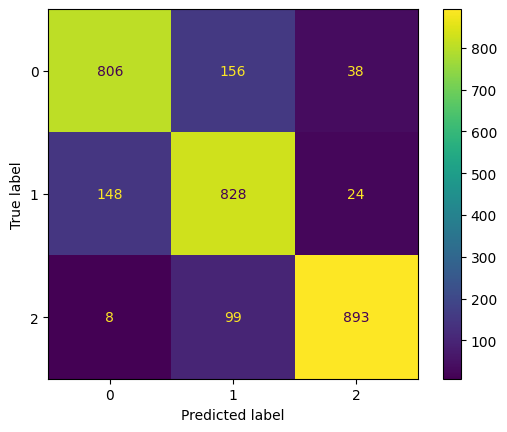

In [12]:
# Plot a confusion matrix
from sklearn import metrics

# Confusion matrix function 
confusion_matrix = metrics.confusion_matrix(labels, preds)

# Convert the table into a confusion matrix display
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

# Plot
cm_display.plot()
plt.show()
